In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurements = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
earliest = session.query(Measurements.date).order_by((Measurements.date).desc()).first()
earliest[0]

'2017-08-23'

In [10]:
# Import date calculation package
from datetime import datetime
from dateutil.relativedelta import relativedelta

2017-08-23
2016-08-23


<Figure size 640x480 with 0 Axes>

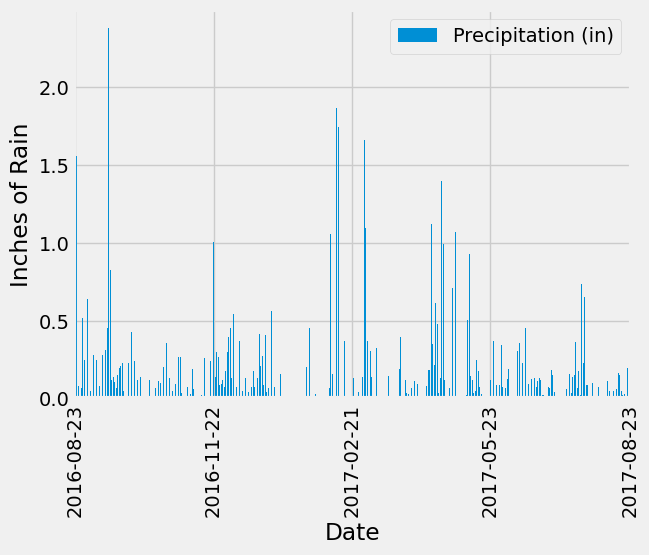

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = datetime.strptime(earliest[0],'%Y-%m-%d').date()
print(end_date)
# Calculate the date one year from the last date in data set.
start_date = end_date - relativedelta(years=1)
print(start_date)

# Perform a query to retrieve the data and precipitation scores
prev_year_prcp = session.query(Measurements.date, func.avg(Measurements.prcp)
                              ).filter(Measurements.date >= start_date, Measurements.date <= end_date
                                      ).group_by(Measurements.date).order_by(Measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
lastYear_df = pd.DataFrame(prev_year_prcp, columns=('Date','Precipitation (in)'))

# # Sort the dataframe by date
lastYear_df = lastYear_df.sort_values(by = 'Date')
lastYear_df
# len(precipitation_df)
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure()
lastYear_df.plot(kind='bar')
n_ticks = 5
indices = np.linspace(0, len(lastYear_df) - 1, n_ticks, dtype=int)
xticks = lastYear_df['Date'][indices].index.tolist()
xlabels = lastYear_df['Date'][indices].values.tolist()
plt.xticks(xticks, xlabels)
plt.xlabel('Date')
plt.ylabel('Inches of Rain')
plt.show()

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
lastYear_df.describe()

,Precipitation (in)
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(func.distinct(Measurements.station))).scalar()
num_stations

9

In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurements.station,func.count(Measurements.prcp)).group_by(
    Measurements.station).order_by(func.count(Measurements.prcp).desc()).all()
station_activity_df = pd.DataFrame(station_activity, columns=('Station','Count of Records'))
station_activity_df

,Station,Count of Records
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity_df['Station'].iloc[0]
most_active_range = session.query(func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)
                                 ).filter(Measurements.station==most_active_station).all()
most_active_range

[(54.0, 85.0, 71.66378066378067)]

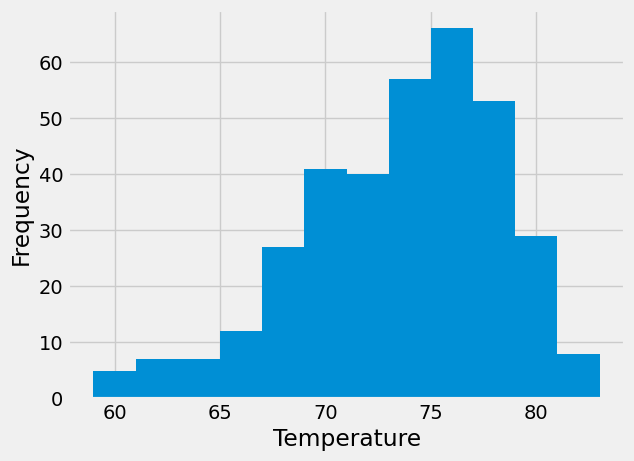

In [71]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temps = session.query(Measurements.tobs).filter(Measurements.station==most_active_station
                                         ).filter(Measurements.date >= start_date, Measurements.date <= end_date).all()
most_active_temps_df = pd.DataFrame(most_active_temps, columns=['Temperature'])
most_active_temps_df

# Plot the results
plt.figure()
plt.hist(most_active_temps_df, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()